In [97]:
import numpy as np
import pandas as pd 


# Creating the DataFrame
data = {
    'Age': [22, 34, 27, 45, 51, 30, 24, 35, 29, 42],
    'Impressions': [1000, 1500, 900, 1200, 1100, 980, 1450, 1600, 1000, 1300],
    'Clicked_Through_Rate': [0.05, 0.03, 0.07, 0.04, 0.02, 0.08, 0.06, 0.02, 0.09, 0.05],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female'],
    'Platform': ['Facebook', 'Instagram', 'Facebook', 'Google', 'Google', 'Instagram', 'Facebook', 'Instagram', 'Google', 'Facebook'],
    'Ad_Type': ['Video', 'Image', 'Carousel', 'Video', 'Image', 'Carousel', 'Video', 'Image', 'Video', 'Carousel'],
    'Ad_Topic': ['Tech', 'Fashion', 'Sports', 'Food', 'Tech', 'Fashion', 'Sports', 'Food', 'Tech', 'Sports'],
    'Clicked': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No']
}

df = pd.DataFrame(data)

df

,Age,Impressions,Clicked_Through_Rate,Gender,Platform,Ad_Type,Ad_Topic,Clicked
0,22,1000,0.05,Male,Facebook,Video,Tech,No
1,34,1500,0.03,Female,Instagram,Image,Fashion,Yes
2,27,900,0.07,Male,Facebook,Carousel,Sports,No
3,45,1200,0.04,Female,Google,Video,Food,Yes
4,51,1100,0.02,Female,Google,Image,Tech,No
5,30,980,0.08,Male,Instagram,Carousel,Fashion,Yes
6,24,1450,0.06,Male,Facebook,Video,Sports,No
7,35,1600,0.02,Female,Instagram,Image,Food,Yes
8,29,1000,0.09,Male,Google,Video,Tech,No
9,42,1300,0.05,Female,Facebook,Carousel,Sports,No


# 1.Data Overview

In [98]:
df.head(3)

,Age,Impressions,Clicked_Through_Rate,Gender,Platform,Ad_Type,Ad_Topic,Clicked
0,22,1000,0.05,Male,Facebook,Video,Tech,No
1,34,1500,0.03,Female,Instagram,Image,Fashion,Yes
2,27,900,0.07,Male,Facebook,Carousel,Sports,No


In [99]:
df.shape

(10, 8)

In [100]:
df.dtypes

Age                       int64
Impressions               int64
Clicked_Through_Rate    float64
Gender                   object
Platform                 object
Ad_Type                  object
Ad_Topic                 object
Clicked                  object
dtype: object

In [101]:
target_variable = 'Clicked'

In [102]:
df.describe()

,Age,Impressions,Clicked_Through_Rate
count,10.000000,10.000000,10.000000
mean,33.900000,1203.000000,0.051000
std,9.480389,247.388583,0.024244
min,22.000000,900.000000,0.020000
25%,27.500000,1000.000000,0.032500
50%,32.000000,1150.000000,0.050000
75%,40.250000,1412.500000,0.067500
max,51.000000,1600.000000,0.090000


In [103]:
df.describe(include = 'all')

,Age,Impressions,Clicked_Through_Rate,Gender,Platform,Ad_Type,Ad_Topic,Clicked
count,10.000000,10.000000,10.000000,10,10,10,10,10
unique,NaN,NaN,NaN,2,3,3,4,2
top,NaN,NaN,NaN,Male,Facebook,Video,Tech,No
freq,NaN,NaN,NaN,5,4,4,3,6
mean,33.900000,1203.000000,0.051000,NaN,NaN,NaN,NaN,NaN
std,9.480389,247.388583,0.024244,NaN,NaN,NaN,NaN,NaN
min,22.000000,900.000000,0.020000,NaN,NaN,NaN,NaN,NaN
25%,27.500000,1000.000000,0.032500,NaN,NaN,NaN,NaN,NaN
50%,32.000000,1150.000000,0.050000,NaN,NaN,NaN,NaN,NaN
75%,40.250000,1412.500000,0.067500,NaN,NaN,NaN,NaN,NaN


In [104]:
df.nunique()

Age                     10
Impressions              9
Clicked_Through_Rate     8
Gender                   2
Platform                 3
Ad_Type                  3
Ad_Topic                 4
Clicked                  2
dtype: int64

In [105]:
df.isnull().sum()

Age                     0
Impressions             0
Clicked_Through_Rate    0
Gender                  0
Platform                0
Ad_Type                 0
Ad_Topic                0
Clicked                 0
dtype: int64

In [106]:
features = df.columns.tolist()
features.remove(target_variable)

# 2. Seperate Target Variable 

In [107]:
y = df[target_variable]

In [108]:
X = df.drop(columns = target_variable)

In [109]:
y.head()

0     No
1    Yes
2     No
3    Yes
4     No
Name: Clicked, dtype: object

In [110]:
X.head()

,Age,Impressions,Clicked_Through_Rate,Gender,Platform,Ad_Type,Ad_Topic
0,22,1000,0.05,Male,Facebook,Video,Tech
1,34,1500,0.03,Female,Instagram,Image,Fashion
2,27,900,0.07,Male,Facebook,Carousel,Sports
3,45,1200,0.04,Female,Google,Video,Food
4,51,1100,0.02,Female,Google,Image,Tech


In [111]:
X.to_csv('train_data.csv', index = False)

# 3. Seperation of different column Types

In [112]:
data_types = df.dtypes
data_types

Age                       int64
Impressions               int64
Clicked_Through_Rate    float64
Gender                   object
Platform                 object
Ad_Type                  object
Ad_Topic                 object
Clicked                  object
dtype: object

In [113]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols

['Age', 'Impressions', 'Clicked_Through_Rate']

In [114]:
string_cols = df.select_dtypes(include=['object']).columns.tolist()
string_cols

['Gender', 'Platform', 'Ad_Type', 'Ad_Topic', 'Clicked']

In [115]:
categorical_cols = ['Gender', 'Platform', 'Ad_Type', 'Ad_Topic']
df[categorical_cols] = df[categorical_cols].astype('category')

categorical_cols = df.select_dtypes(include=['category']).columns.tolist()
categorical_cols

['Gender', 'Platform', 'Ad_Type', 'Ad_Topic']

In [116]:
df.head(2)

,Age,Impressions,Clicked_Through_Rate,Gender,Platform,Ad_Type,Ad_Topic,Clicked
0,22,1000,0.05,Male,Facebook,Video,Tech,No
1,34,1500,0.03,Female,Instagram,Image,Fashion,Yes


In [117]:
boolean_cols = df.select_dtypes(include=['bool']).columns.tolist()
boolean_cols

[]

In [118]:
date_time_cols = df.select_dtypes(include=['datetime64']).columns.tolist()
date_time_cols

[]

# 4. -- EDA - Numerical Columns

In [119]:
# Using .describe() to get a variety of summary statistics
summary = df.describe()
print("Summary Statistics:")
summary

Summary Statistics:


,Age,Impressions,Clicked_Through_Rate
count,10.000000,10.000000,10.000000
mean,33.900000,1203.000000,0.051000
std,9.480389,247.388583,0.024244
min,22.000000,900.000000,0.020000
25%,27.500000,1000.000000,0.032500
50%,32.000000,1150.000000,0.050000
75%,40.250000,1412.500000,0.067500
max,51.000000,1600.000000,0.090000


# 4.1 Summary Statistics

In [120]:
# Compute and print additional summary statistics for each numerical column
for col in numerical_cols:
    mode = df[col].mode().iloc[0]  # Get the mode of the column
    range_val = df[col].max() - df[col].min()  # Compute the range of the column
    variance = df[col].var()  # Compute the variance of the column
    print(f"\nAdditional Statistics for {col}:")
    print(f"Mode: {mode}")
    print(f"Range: {range_val}")
    print(f"Variance: {variance}")

# Note: .describe() already provides count, mean, std, min, 25%, 50%, 75%, max
# Therefore, the additional computations are for mode, range, and variance



Additional Statistics for Age:
Mode: 22
Range: 29
Variance: 89.87777777777778

Additional Statistics for Impressions:
Mode: 1000
Range: 700
Variance: 61201.11111111111

Additional Statistics for Clicked_Through_Rate:
Mode: 0.02
Range: 0.06999999999999999
Variance: 0.0005877777777777778


# 4.2 Dsitribution Analysis

In [126]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set(style = 'whitegrid')

numerical_cols

['Age', 'Impressions', 'Clicked_Through_Rate']

In [122]:
plt.figure(figsize = (12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [123]:
df.head()

,Age,Impressions,Clicked_Through_Rate,Gender,Platform,Ad_Type,Ad_Topic,Clicked
0,22,1000,0.05,Male,Facebook,Video,Tech,No
1,34,1500,0.03,Female,Instagram,Image,Fashion,Yes
2,27,900,0.07,Male,Facebook,Carousel,Sports,No
3,45,1200,0.04,Female,Google,Video,Food,Yes
4,51,1100,0.02,Female,Google,Image,Tech,No


# Histograms

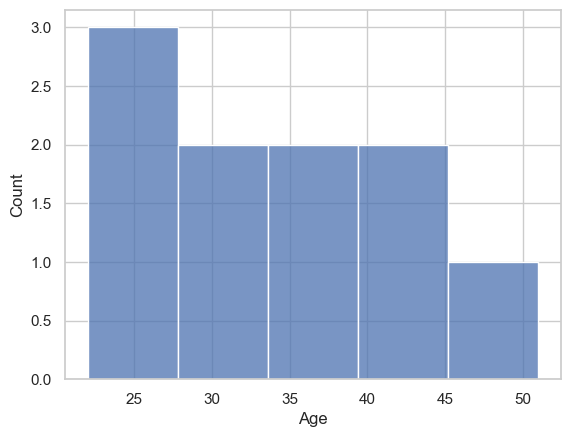

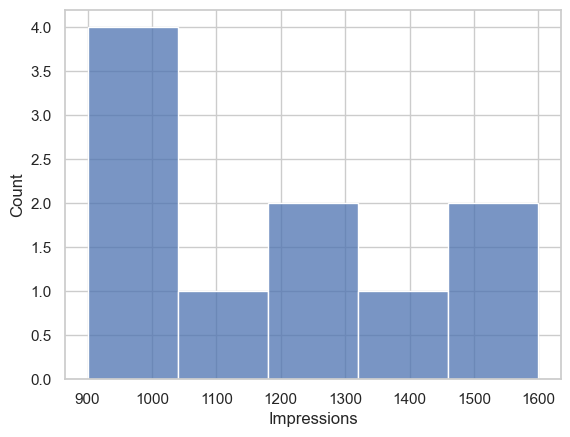

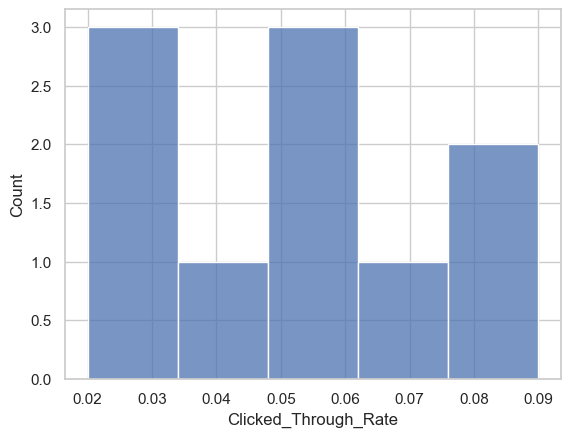

In [128]:
# Histogram
for col in numerical_cols:
    sns.histplot(df[col])
    plt.show()

# KDE Plots

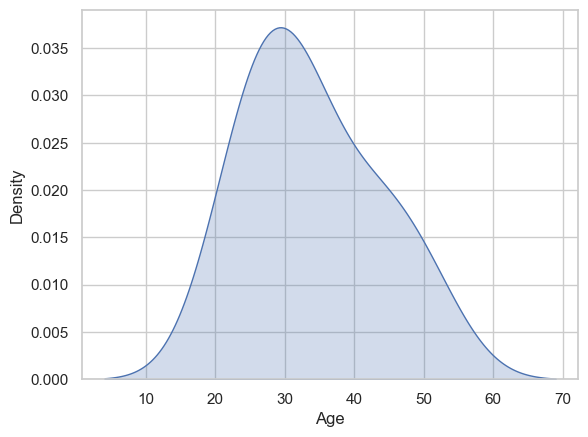

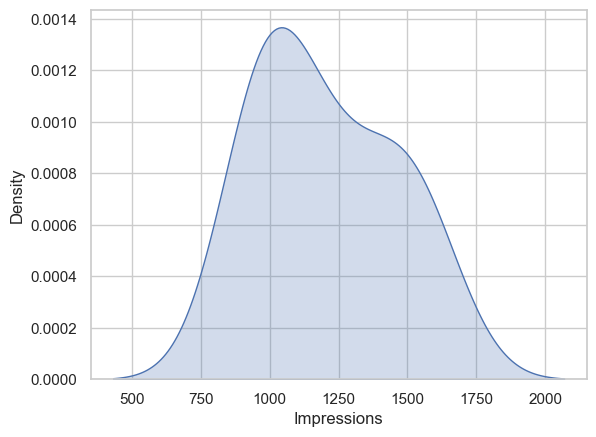

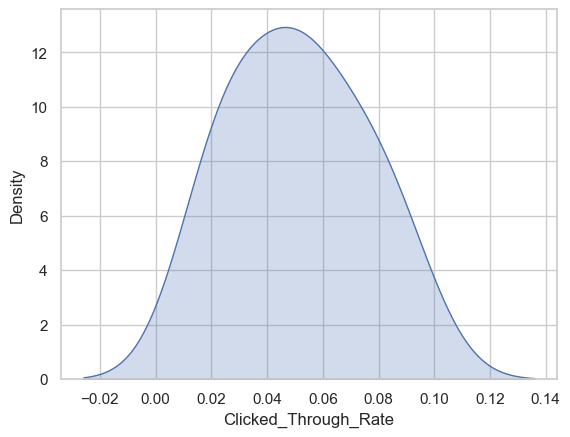

In [129]:
for col in numerical_cols:
    sns.kdeplot(df[col], fill=True)
    plt.show()

# Box plots

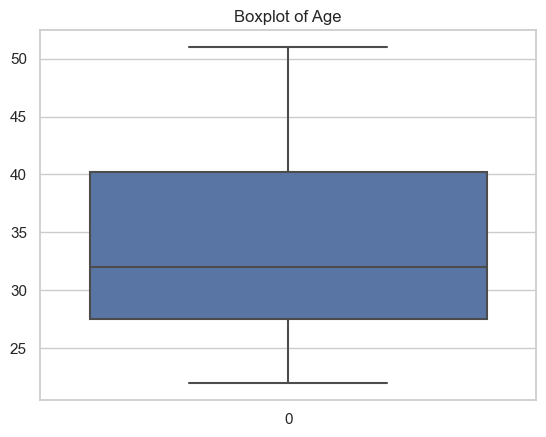

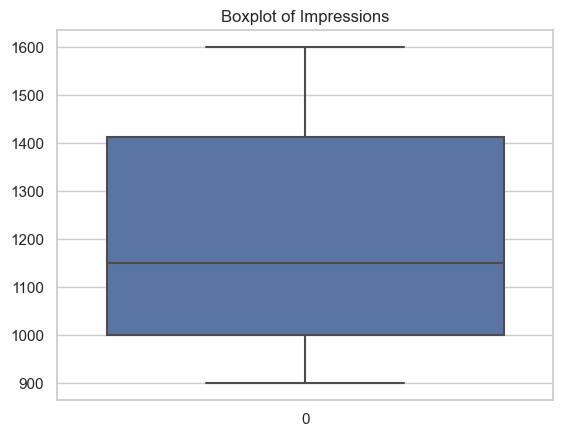

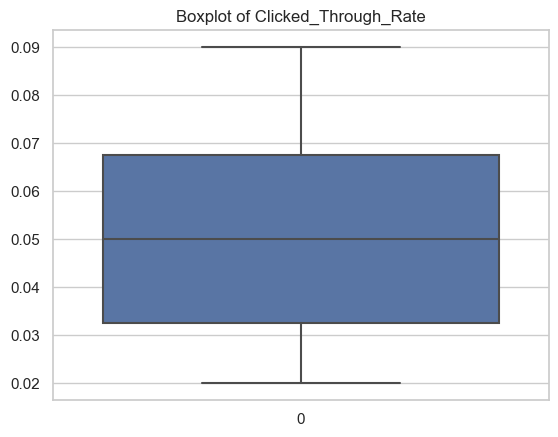

In [134]:
for col in numerical_cols:
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Outlier detection using Box Plots -- Code

In [149]:
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(outlier)

if outlier.empty:
    print(100)
    

Empty DataFrame
Columns: [Age, Impressions, Clicked_Through_Rate, Gender, Platform, Ad_Type, Ad_Topic, Clicked]
Index: []
100


Outliers Analysis for Age:
No outliers found in Age

--------------------------------------------------

Outliers Analysis for Impressions:
No outliers found in Impressions

--------------------------------------------------

Outliers Analysis for Clicked_Through_Rate:
No outliers found in Clicked_Through_Rate

--------------------------------------------------



In [135]:
# Skewness 

skewness = df[col].skew()
skewness

0.2058456404087572

In [136]:
# kurtosis 
kurtosis = df[col].kurtosis() 
kurtosis

-1.0455580133004108

In [150]:
numerical_df = df[numerical_cols]

In [155]:
corr_matrix = numerical_df.corr()
corr_matrix

,Age,Impressions,Clicked_Through_Rate
Age,1.000000,0.160271,-0.584455
Impressions,0.160271,1.000000,-0.613752
Clicked_Through_Rate,-0.584455,-0.613752,1.000000


<Axes: >

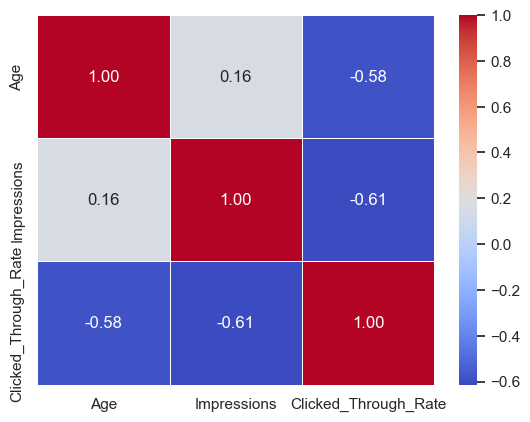

In [154]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")

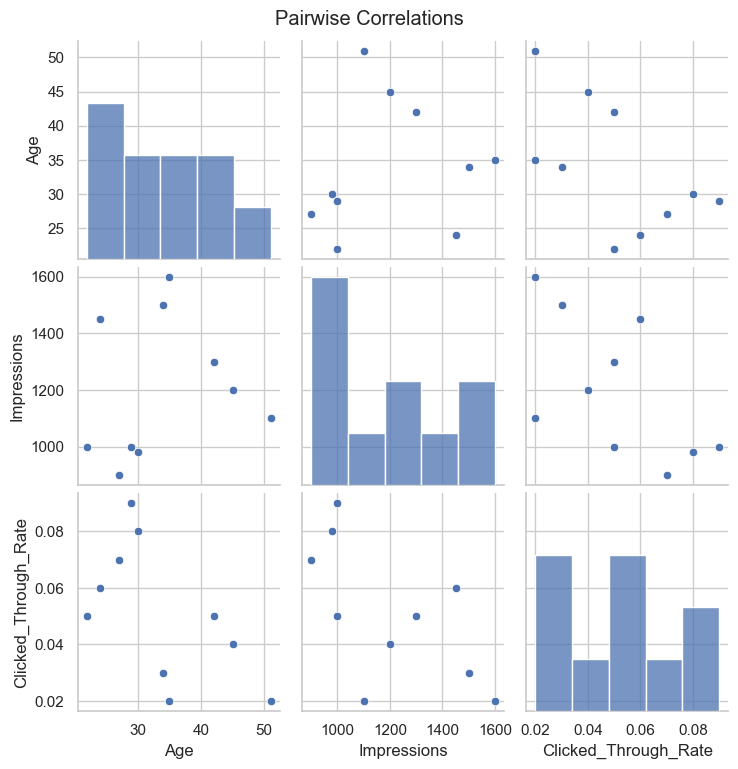

In [156]:
# Plotting pairwise relationships in the dataset
pair_plot = sns.pairplot(numerical_df)

# Setting plot title
pair_plot.fig.suptitle('Pairwise Correlations', y=1.02)

# Show the plot
plt.show()

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([22, 24, 27, 29, 30, 34, 35, 42, 45, 51], dtype=int64)),
 (10.107641589448912, 33.9, 0.978122072956544))

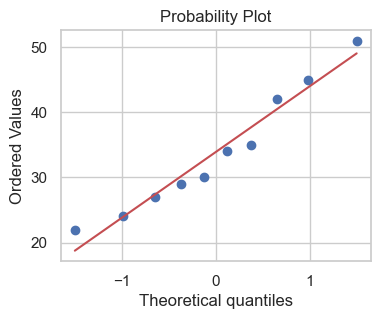

In [159]:
# Generate QQ plot
plt.figure(figsize=(4, 3))
import scipy.stats as stats

stats.probplot(df['Age'], dist="norm", plot=plt)